In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

rallyname = 'Kentavros'
raceDate = '31/03/2021'
surface = 'Tarmac'
competition = 'Greek Cup'

link = 'https://www.ewrc-results.com/results/88551-rally-kentavros-2024/?s='
startat, no_ss=456374, int(4)

canceled = []


stages = [number for number in range(no_ss)]

rally_23 = []

/home/ilias/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)

In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    
    my_url11 = link + ss_a
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

/tmp/ipykernel_11085/3138041723.py:15: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')


In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[:3]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#4,Avgeropoulos C,C4,4:50.63,-,82.9,1,Kentavros,31/03/2021,Tarmac,Greek Cup,1
1,2,#3,Vlachos Aposto,C2,4:51.37,+0.74 + 0.74,82.7 0.11,1,Kentavros,31/03/2021,Tarmac,Greek Cup,2
2,3,#1,Titov Anton -,C1,4:53.10,+2.47 + 1.73,82.2 0.37,1,Kentavros,31/03/2021,Tarmac,Greek Cup,3
3,4,#2,Moschos A. -,C3,4:53.36,+2.73 + 0.26,82.1 0.41,1,Kentavros,31/03/2021,Tarmac,Greek Cup,4
4,5,#5,Karathanassis,C5,4:59.47,+8.84 + 6.11,80.4 1.32,1,Kentavros,31/03/2021,Tarmac,Greek Cup,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,12,#18,Benoukas Marin,C6,9:12.22,+1:07.51 + 4.09,87.7 5.02,4,Kentavros,31/03/2021,Tarmac,Greek Cup,12
12,13,#22,Tzigas-Zygas G,C6,9:15.90,+1:11.19 + 3.68,87.2 5.29,4,Kentavros,31/03/2021,Tarmac,Greek Cup,13
13,14,#20,Mossios Ioanni,C6,9:18.61,+1:13.90 + 2.71,86.7 5.49,4,Kentavros,31/03/2021,Tarmac,Greek Cup,14
14,15,#17,Polichronopoul,C6,9:21.38,+1:16.67 + 2.77,86.3 5.70,4,Kentavros,31/03/2021,Tarmac,Greek Cup,15


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [8]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [12]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.png'))


CalledProcessError: Command '['--enable-logging', '--disable-gpu', '--headless', '--crash-dumps-dir=/home/ilias/.dataframe_image/tmp38js9b7p', '--force-device-scale-factor=1', '--window-size=1400,900', '--hide-scrollbars', '--screenshot=/home/ilias/.dataframe_image/tmp38js9b7p/temp.png', '/home/ilias/.dataframe_image/tmp38js9b7p/temp.html']' returned non-zero exit status 64.

In [13]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Avgeropoulos C,C4,1,Kentavros,31/03/2021,Tarmac,Greek Cup,1,290.63
1,Vlachos Aposto,C2,1,Kentavros,31/03/2021,Tarmac,Greek Cup,2,291.37
2,Titov Anton -,C1,1,Kentavros,31/03/2021,Tarmac,Greek Cup,3,293.10
3,Moschos A. -,C3,1,Kentavros,31/03/2021,Tarmac,Greek Cup,4,293.36
4,Karathanassis,C5,1,Kentavros,31/03/2021,Tarmac,Greek Cup,5,299.47
...,...,...,...,...,...,...,...,...,...
11,Benoukas Marin,C6,4,Kentavros,31/03/2021,Tarmac,Greek Cup,12,552.22
12,Tzigas-Zygas G,C6,4,Kentavros,31/03/2021,Tarmac,Greek Cup,13,555.90
13,Mossios Ioanni,C6,4,Kentavros,31/03/2021,Tarmac,Greek Cup,14,558.61
14,Polichronopoul,C6,4,Kentavros,31/03/2021,Tarmac,Greek Cup,15,561.38


In [14]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Gr/Cl'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race      ss Gr/Cl             
Kentavros 1  C1          293.10
             C2          291.37
             C3          293.36
             C4          290.63
             C5          299.47
             C6          324.33
          2  C1          494.78
             C2          484.99
             C3          492.67
             C4          489.89
             C5          506.43
             C6          537.76
          3  C1          289.94
             C2          285.76
             C3          290.88
             C4          286.34
             C5          300.82
             C6          312.59
          4  C1          492.29
             C2          484.71
             C3          487.63
             C4          487.42
             C5          511.04
             C6          529.04

In [15]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff_G']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_G%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Avgeropoulos C,C4,1,Kentavros,31/03/2021,Tarmac,Greek Cup,1,290.63,290.63,290.63,0.00,0.00,0.000000,01
1,Vlachos Aposto,C2,1,Kentavros,31/03/2021,Tarmac,Greek Cup,2,291.37,291.37,290.63,0.74,0.00,0.000000,01
2,Nomikos Ioanni,C2,1,Kentavros,31/03/2021,Tarmac,Greek Cup,8,315.90,291.37,290.63,25.27,24.53,8.418849,01
3,Titov Anton -,C1,1,Kentavros,31/03/2021,Tarmac,Greek Cup,3,293.10,293.10,290.63,2.47,0.00,0.000000,01
4,Moschos A. -,C3,1,Kentavros,31/03/2021,Tarmac,Greek Cup,4,293.36,293.36,290.63,2.73,0.00,0.000000,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Gerodimos Gior,C6,4,Kentavros,31/03/2021,Tarmac,Greek Cup,9,536.33,529.04,484.71,51.62,7.29,1.377968,04
66,Benoukas Marin,C6,4,Kentavros,31/03/2021,Tarmac,Greek Cup,12,552.22,529.04,484.71,67.51,23.18,4.381521,04
67,Tzigas-Zygas G,C6,4,Kentavros,31/03/2021,Tarmac,Greek Cup,13,555.90,529.04,484.71,71.19,26.86,5.077121,04
68,Mossios Ioanni,C6,4,Kentavros,31/03/2021,Tarmac,Greek Cup,14,558.61,529.04,484.71,73.90,29.57,5.589369,04


In [16]:
Group = 'C1'
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2', 'C3', 'C4', 'C5', 'C6']))]
ss_times_WRC.to_csv(str(rallyname) + str(Group) + '.csv')
#ss_times_WRC.to_csv('test2.csv')

In [17]:
ss_times_F3 =ss_times_WRC.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_F4

SS.,01,02,03,04
Crew,,,,
Avgeropoulos C,0.00,0.00,0.00,0.00
Baxevanakis P.,27.47,40.94,19.79,37.56
Benoukas Marin,11.87,19.46,16.18,23.18
Damassiotis E.,33.53,81.29,42.59,52.20
Gerodimos Gior,0.00,0.00,8.24,7.29
Kapralos D. -,33.44,52.86,28.90,60.50
Karathanassis,0.00,0.00,0.00,0.00
Moschos A. -,0.00,0.00,0.00,0.00
Mossios Ioanni,8.67,42.18,22.43,29.57


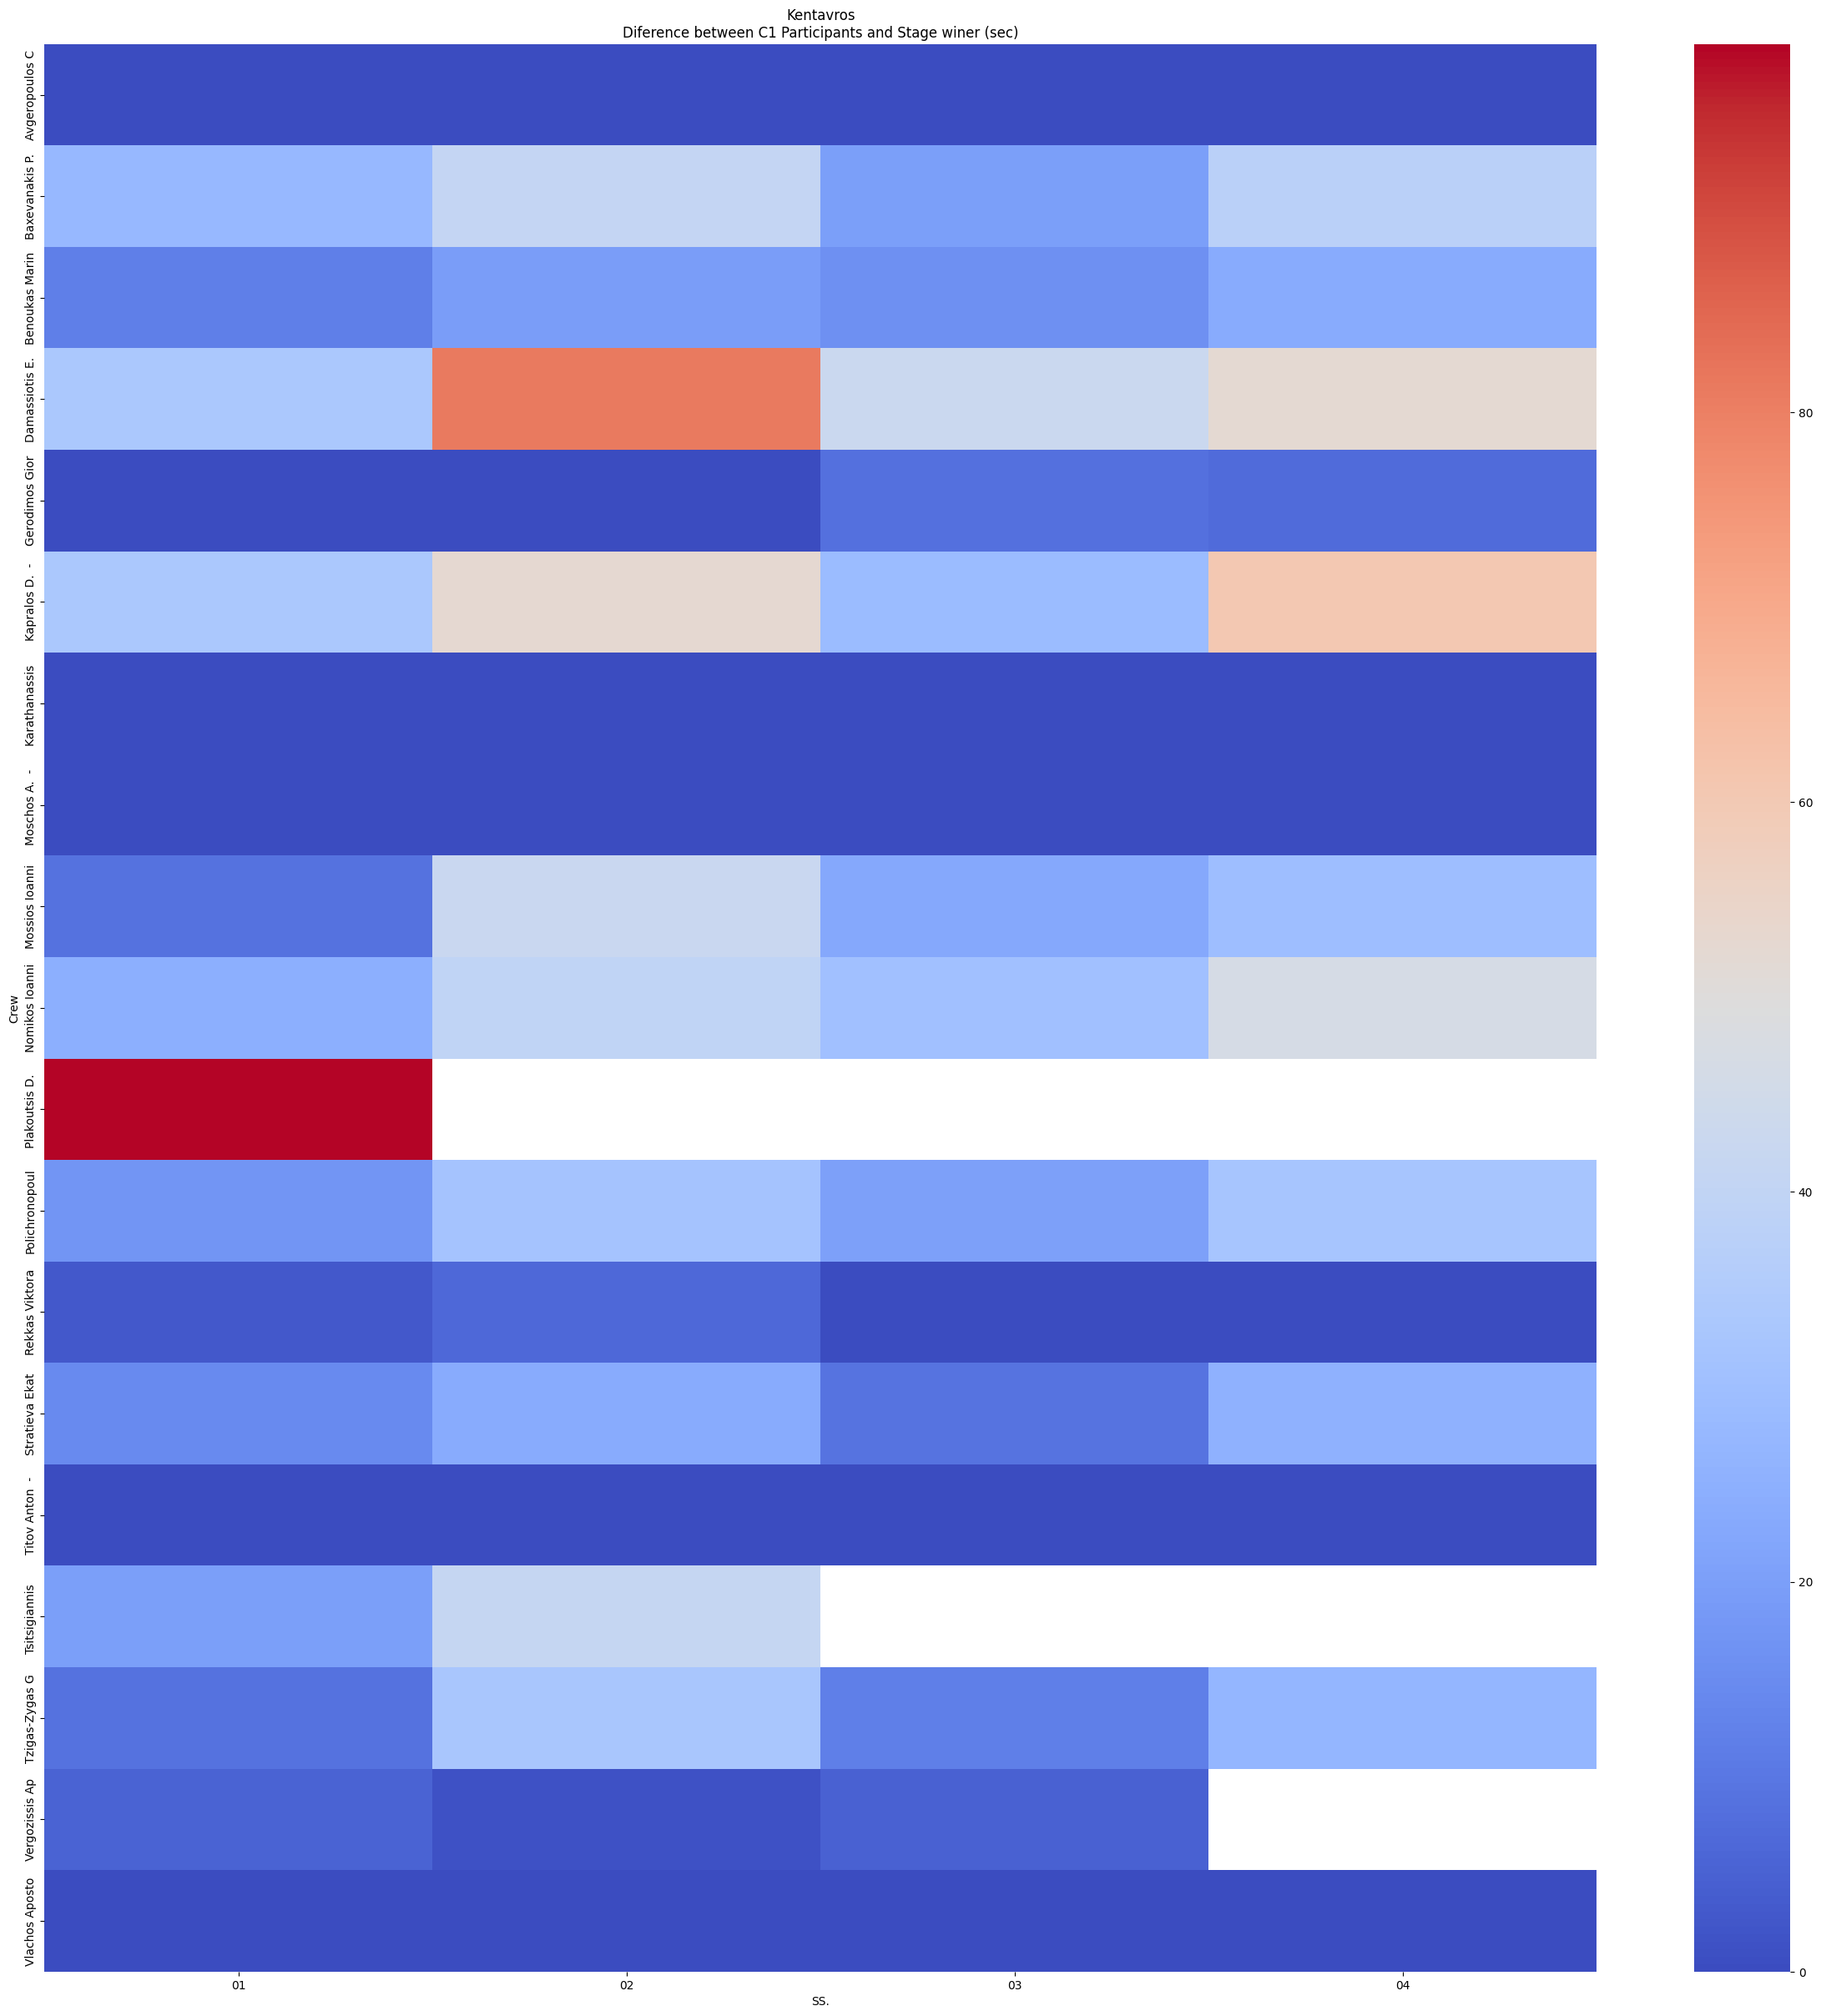

In [18]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
#plt.savefig("Heatmap_" + Group + ".png")
plt.show()

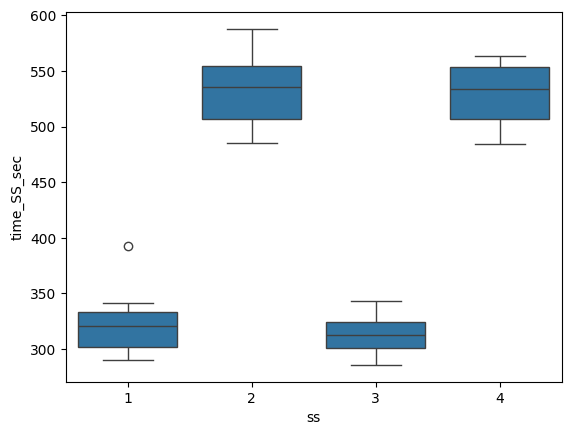

In [19]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
#plt.savefig("Boxplot_" + Group + ".png")

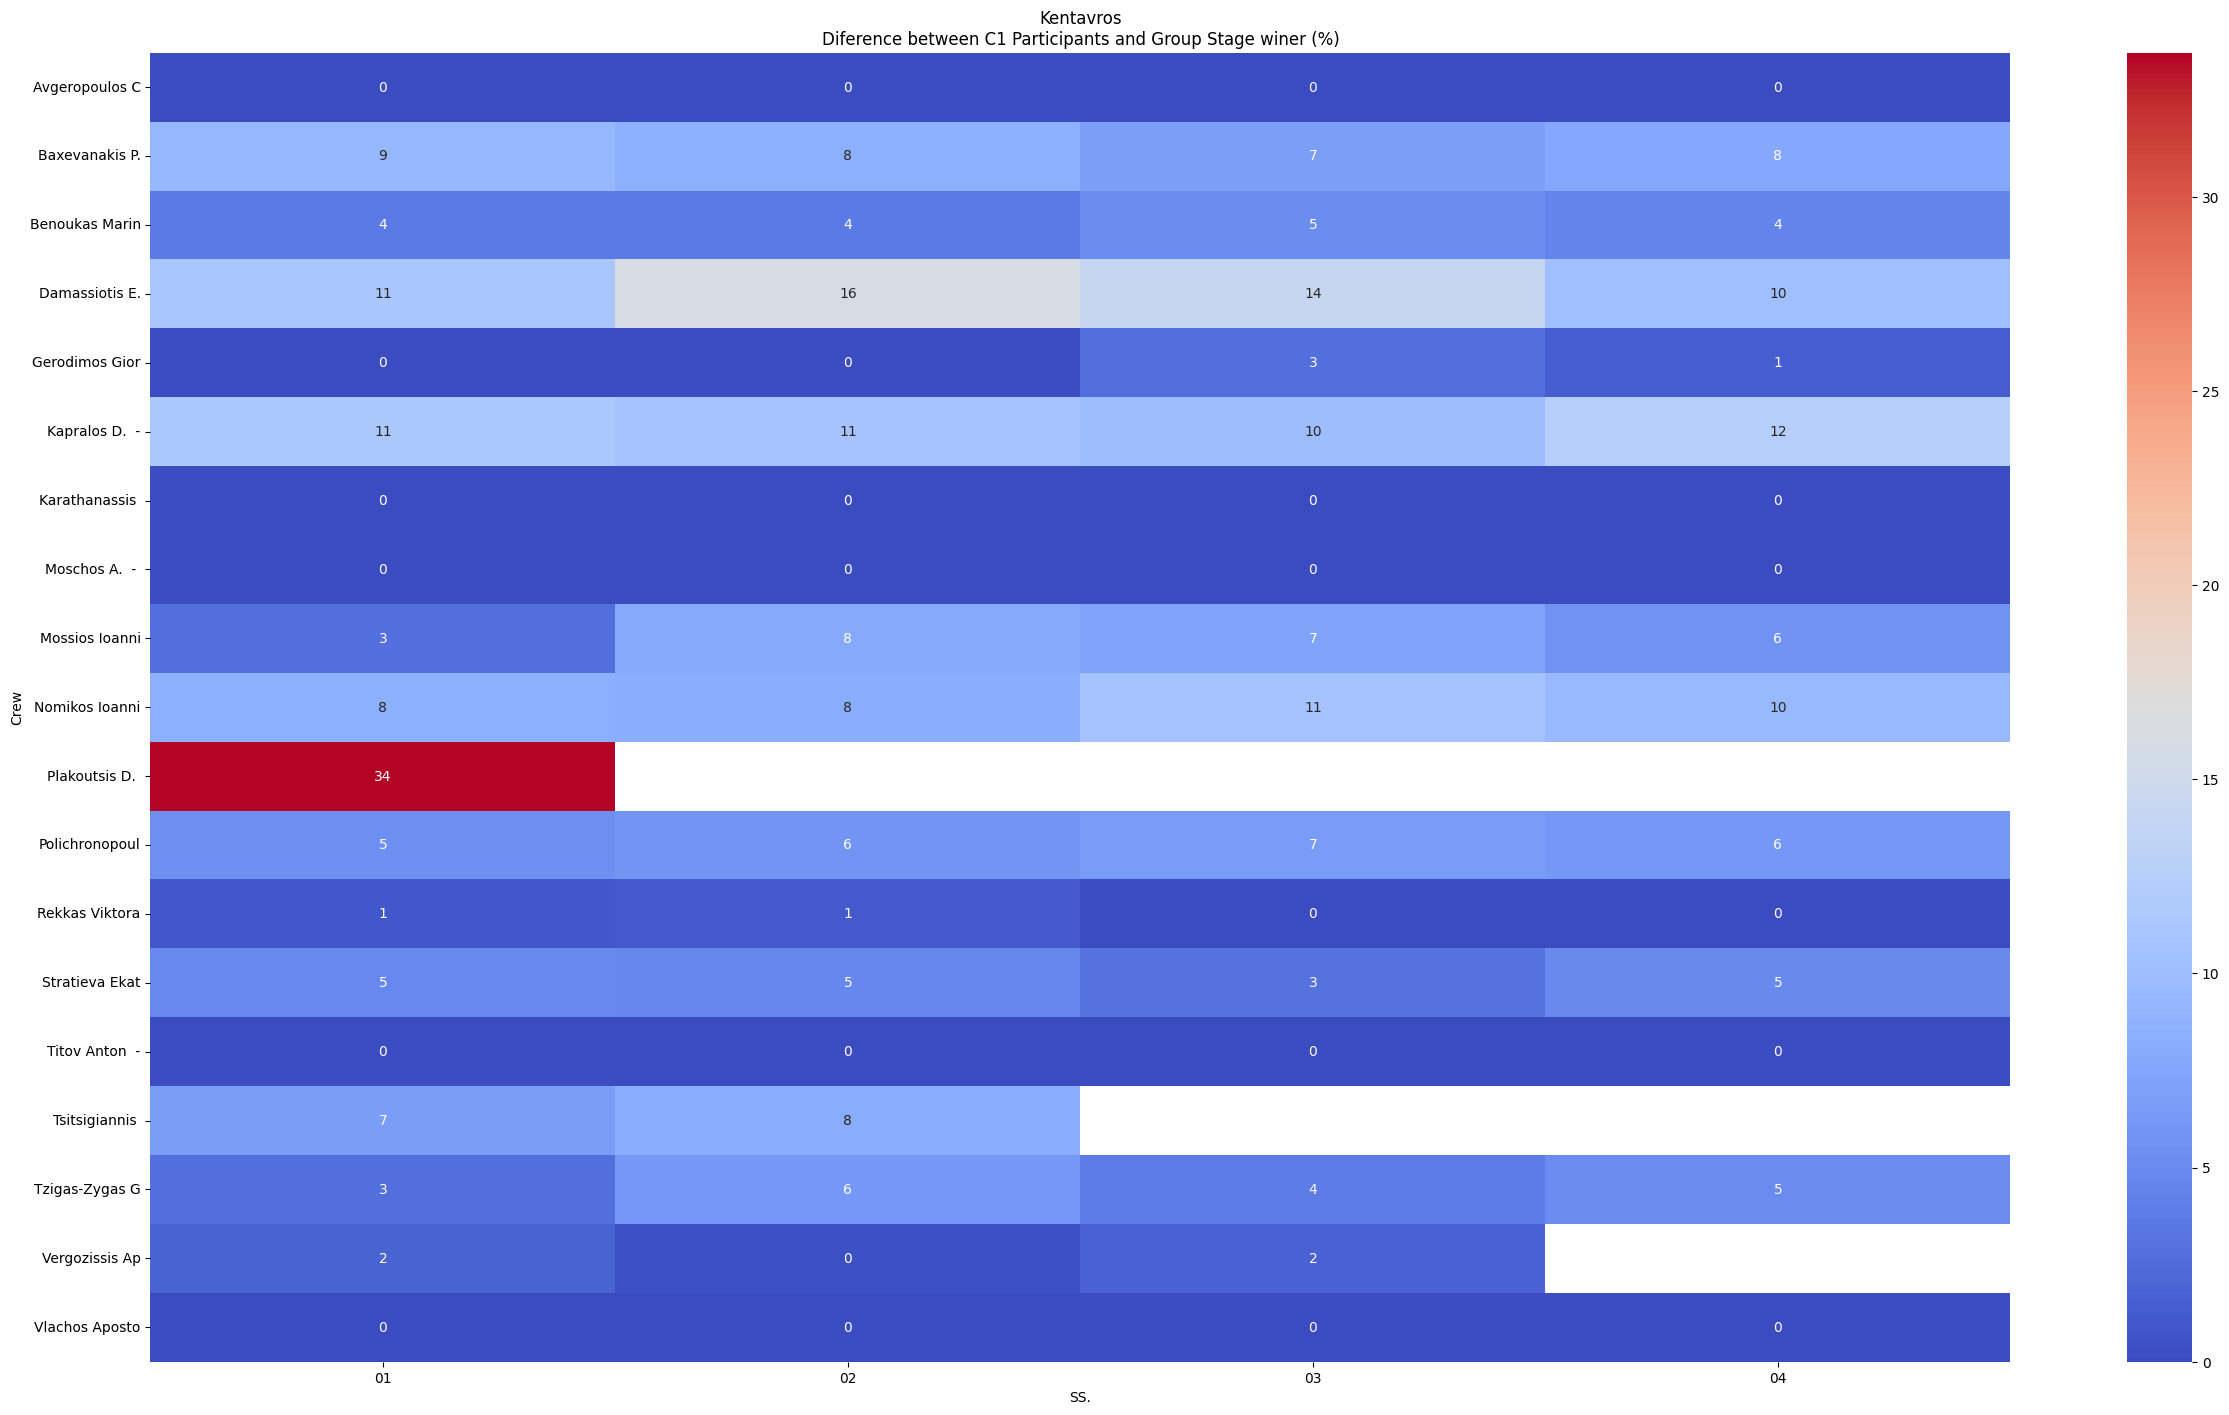

In [20]:
#ss_times_F3
fig,ax = plt.subplots()
fig.set_size_inches(30,17)
ss_timesa = pd.pivot_table(ss_times_F3, values='diff_G%', index='Crew', columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Group Stage winer (%)')
plt.savefig(rallyname + Group + ".jpg")
plt.show()